In [25]:
import os
from os.path import abspath, dirname, join
import sys
from glob import glob
import random
import hydra
import seaborn as sn
import matplotlib.pyplot as plt
from hydra.experimental import initialize, initialize_config_module, initialize_config_dir, compose
from omegaconf import OmegaConf, DictConfig
import cv2
import numpy as np
import pandas as pd
from omegaconf import OmegaConf
from tqdm import tqdm
import torch

root = abspath(join(dirname("__file__"), '../../'))
sys.path.append(root)

import matplotlib.pyplot as plt

In [2]:
!ls -lt ../../data/open_images_person/split

total 442896
-rw-rw-r-- 1 r_suzuki r_suzuki 99545385 Dec 26 19:56 train_5folds.csv
-rw-rw-r-- 1 r_suzuki r_suzuki  3808049 Oct 28 23:00 test_person_v3.csv
-rw-rw-r-- 1 r_suzuki r_suzuki 55648656 Oct 28 22:46 train_folds.csv
-rw-rw-r-- 1 r_suzuki r_suzuki  5477561 Oct 28 22:38 test_person_v4.csv
-rw-rw-r-- 1 r_suzuki r_suzuki 97015055 Oct 26 12:31 train_folds_v2.csv
drwxrwxr-x 2 r_suzuki r_suzuki     4096 Oct 21 20:10 tmp
-rw-rw-r-- 1 r_suzuki r_suzuki 51787197 Sep  7 17:52 train_folds_split03.csv
-rw-rw-r-- 1 r_suzuki r_suzuki 52548113 Sep  2 15:57 train_folds_split02.csv
-rw-rw-r-- 1 r_suzuki r_suzuki 87668764 Sep  1 18:54 train_folds_all.csv


In [3]:
train = pd.read_csv('../../data/open_images_person/split/train_folds.csv')

In [4]:
train.fold.unique()

array([1, 0])

In [5]:
train.image_id.nunique()

85191

In [16]:
train[train['fold']==0]

,image_id,source,image_height,image_width,xmin,xmax,ymin,ymax,width,height,area,fold,class_id
416397,2b9352a5f336fe99,freeform,685.0,1024.0,298.811392,887.808000,83.636445,300.187550,588.996608,216.551105,127547.866304,0,1
416398,37a339d612fbd8dc,freeform,1024.0,1015.0,325.051720,695.411010,292.452352,950.445056,370.359290,657.992704,243693.710679,0,1
416399,f2981cfdaea8a1bf,freeform,1024.0,612.0,99.523440,174.322080,512.320512,618.726400,74.798640,106.405888,7959.015710,0,1
416400,f2981cfdaea8a1bf,freeform,1024.0,612.0,156.722796,225.361656,579.153920,614.329344,68.638860,35.175424,2414.401003,0,1
416401,f2981cfdaea8a1bf,freeform,1024.0,612.0,180.786636,248.505660,538.283008,612.340736,67.719024,74.057728,5015.117060,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
422101,38db4c55f3145ccf,freeform,768.0,1024.0,371.931136,662.692864,294.424320,471.826176,290.761728,177.401856,51581.670201,0,1
422102,10f8247c26517d80,freeform,683.0,1024.0,135.717888,250.322944,118.198614,532.313125,114.605056,414.114511,47459.616724,0,1
422103,10f8247c26517d80,freeform,683.0,1024.0,313.533440,548.651008,52.532262,681.394950,235.117568,628.862688,147856.665809,0,1
422104,10f8247c26517d80,freeform,683.0,1024.0,753.641472,901.918720,105.775527,593.839131,148.277248,488.063604,72368.728050,0,1


In [20]:
train_folds = pd.read_csv('../../data/open_images_person/split/train_5folds.csv')

In [21]:
train_folds.fold.unique()

array([1, 3, 2, 0, 4])

In [22]:
train_folds.image_id.nunique()

85191

In [23]:
train_folds

,image_id,image_path,source,class_id,image_height,image_width,xmin,xmax,ymin,ymax,width,height,area,count,fold,stratify_group
0,f0d371c4c6dafb2c,/data1/r_suzuki/pipeline/BaseModel/data/open_i...,xclick,1,683.0,1024.0,346.999808,362.999808,284.000279,332.000153,16.000000,47.999874,767.997984,8,1,xclick_0
1,f0d371c4c6dafb2c,/data1/r_suzuki/pipeline/BaseModel/data/open_i...,xclick,1,683.0,1024.0,355.000320,369.999872,313.999688,349.999935,14.999552,36.000247,539.987577,8,1,xclick_0
2,f0d371c4c6dafb2c,/data1/r_suzuki/pipeline/BaseModel/data/open_i...,xclick,1,683.0,1024.0,396.999680,408.000512,280.999860,313.999688,11.000832,32.999828,363.025564,8,1,xclick_0
3,f0d371c4c6dafb2c,/data1/r_suzuki/pipeline/BaseModel/data/open_i...,xclick,1,683.0,1024.0,435.999744,453.000192,285.000191,320.999755,17.000448,35.999564,612.008716,8,1,xclick_0
4,f0d371c4c6dafb2c,/data1/r_suzuki/pipeline/BaseModel/data/open_i...,xclick,1,683.0,1024.0,449.000448,469.000192,281.999772,327.999822,19.999744,46.000050,919.989224,8,1,xclick_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422101,38db4c55f3145ccf,/data1/r_suzuki/pipeline/BaseModel/data/open_i...,freeform,1,768.0,1024.0,371.931136,662.692864,294.424320,471.826176,290.761728,177.401856,51581.670201,1,3,freeform_0
422102,10f8247c26517d80,/data1/r_suzuki/pipeline/BaseModel/data/open_i...,freeform,1,683.0,1024.0,135.717888,250.322944,118.198614,532.313125,114.605056,414.114511,47459.616724,3,2,freeform_0
422103,10f8247c26517d80,/data1/r_suzuki/pipeline/BaseModel/data/open_i...,freeform,1,683.0,1024.0,313.533440,548.651008,52.532262,681.394950,235.117568,628.862688,147856.665809,3,2,freeform_0
422104,10f8247c26517d80,/data1/r_suzuki/pipeline/BaseModel/data/open_i...,freeform,1,683.0,1024.0,753.641472,901.918720,105.775527,593.839131,148.277248,488.063604,72368.728050,3,2,freeform_0


In [27]:
train_folds[train_folds['image_id']=='f0d371c4c6dafb2c']

,image_id,image_path,source,class_id,image_height,image_width,xmin,xmax,ymin,ymax,width,height,area,count,fold,stratify_group
0,f0d371c4c6dafb2c,/data1/r_suzuki/pipeline/BaseModel/data/open_i...,xclick,1,683.0,1024.0,346.999808,362.999808,284.000279,332.000153,16.000000,47.999874,767.997984,8,1,xclick_0
1,f0d371c4c6dafb2c,/data1/r_suzuki/pipeline/BaseModel/data/open_i...,xclick,1,683.0,1024.0,355.000320,369.999872,313.999688,349.999935,14.999552,36.000247,539.987577,8,1,xclick_0
2,f0d371c4c6dafb2c,/data1/r_suzuki/pipeline/BaseModel/data/open_i...,xclick,1,683.0,1024.0,396.999680,408.000512,280.999860,313.999688,11.000832,32.999828,363.025564,8,1,xclick_0
3,f0d371c4c6dafb2c,/data1/r_suzuki/pipeline/BaseModel/data/open_i...,xclick,1,683.0,1024.0,435.999744,453.000192,285.000191,320.999755,17.000448,35.999564,612.008716,8,1,xclick_0
4,f0d371c4c6dafb2c,/data1/r_suzuki/pipeline/BaseModel/data/open_i...,xclick,1,683.0,1024.0,449.000448,469.000192,281.999772,327.999822,19.999744,46.000050,919.989224,8,1,xclick_0
5,f0d371c4c6dafb2c,/data1/r_suzuki/pipeline/BaseModel/data/open_i...,xclick,1,683.0,1024.0,679.000064,695.000064,293.000170,346.000287,16.000000,53.000117,848.001872,8,1,xclick_0
6,f0d371c4c6dafb2c,/data1/r_suzuki/pipeline/BaseModel/data/open_i...,xclick,1,683.0,1024.0,704.000000,721.999872,303.999885,346.000287,17.999872,42.000402,756.001860,8,1,xclick_0
7,f0d371c4c6dafb2c,/data1/r_suzuki/pipeline/BaseModel/data/open_i...,xclick,1,683.0,1024.0,748.000256,764.000256,300.000237,344.999692,16.000000,44.999455,719.991280,8,1,xclick_0


In [11]:
204621 + 416397

621018

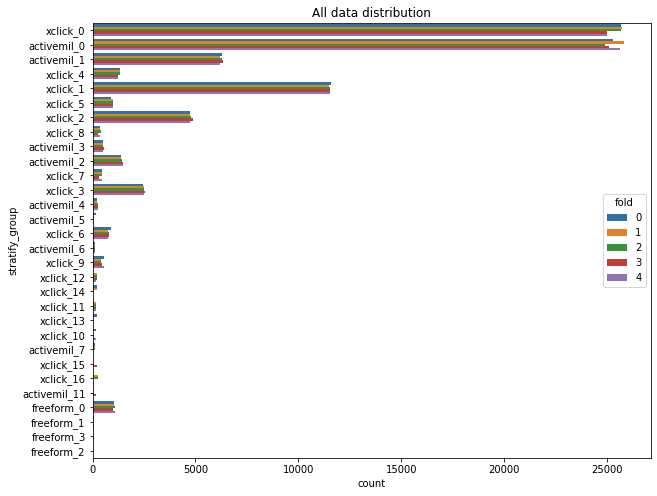

In [26]:
plt.figure(figsize=(10, 8))
plt.title('All data distribution')
sn.countplot(y="stratify_group", data=train_folds, hue='fold');

In [28]:
337466+84640

422106

In [29]:
337466/422106

0.7994816467901428